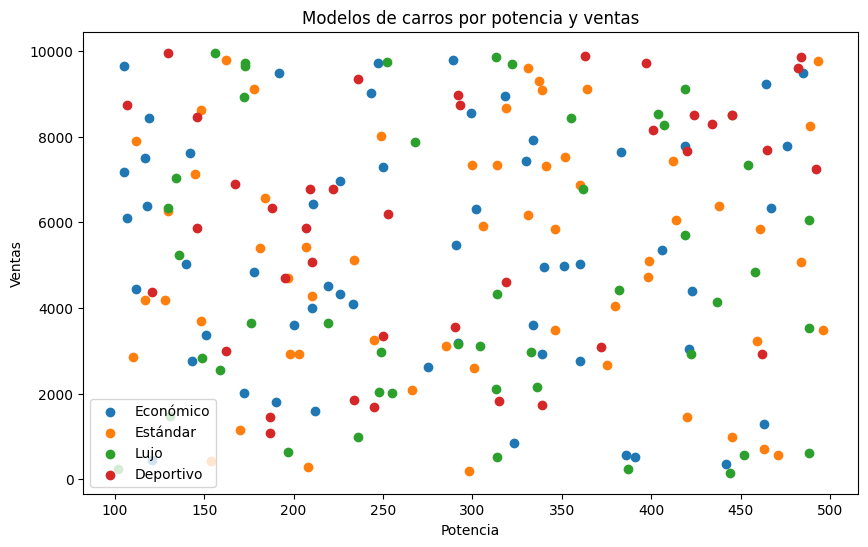

Económico: 56 objetos
Estándar: 58 objetos
Lujo: 47 objetos
Deportivo: 39 objetos


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import gaussian_kde


# Configuración de los parámetros del conjunto de datos
num_registros = 200
modelos = ['Sedan', 'SUV', 'Camioneta', 'Hatchback']
ventas_min = 100
ventas_max = 10000
potencia_min = 100
potencia_max = 500

# Creación de los datos sintéticos
modelos_carros = np.random.choice(modelos, num_registros)
ventas = np.random.randint(ventas_min, ventas_max+1, num_registros)
potencias = np.random.randint(potencia_min, potencia_max+1, num_registros)
clases = np.random.randint(0, 4, num_registros)
ciudades = np.random.choice(['Ciudad A', 'Ciudad B', 'Ciudad C', 'Ciudad D', 'Ciudad E'], num_registros)
anios = np.random.randint(2010, 2023, num_registros)
colores = np.random.choice(['Rojo', 'Azul', 'Verde', 'Negro', 'Blanco'], num_registros)

# Creación del DataFrame
df = pd.DataFrame({'modelo': modelos_carros, 'ventas': ventas, 'potencia': potencias, 'clase': clases, 'ciudad': ciudades, 'anio': anios, 'color': colores})

# División de los datos en conjuntos de entrenamiento y prueba
X = df[['potencia', 'ventas']]
y = df['clase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Mapeo de clases a nombres
nombres_clases = {0: 'Económico', 1: 'Estándar', 2: 'Lujo', 3: 'Deportivo'}

# Graficar los datos
plt.figure(figsize=(10, 6))
for clase in range(4):
    plt.scatter(df[df['clase'] == clase]['potencia'], df[df['clase'] == clase]['ventas'], label=nombres_clases[clase])
plt.xlabel('Potencia')
plt.ylabel('Ventas')
plt.title('Modelos de carros por potencia y ventas')
plt.legend()
plt.show()

# Imprimir la cantidad de objetos etiquetados de cada clase
for clase in range(4):
    cantidad = len(df[df['clase'] == clase])
    print(f'{nombres_clases[clase]}: {cantidad} objetos')

In [2]:
# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)
print(X_test_scaled)

[[ 0.34671272  1.30954671]
 [-1.00371146 -0.20651469]
 [-1.48181195 -0.37326363]
 [ 1.6048719   1.00918484]
 [-0.76046735  0.16582001]
 [-0.63465144  0.49041036]
 [ 0.2796109   0.27413556]
 [ 0.89191503  1.11322477]
 [ 1.56293326  1.58995571]
 [ 0.2796109   1.4926855 ]
 [ 1.16871005 -0.45129358]
 [-0.60110052 -0.38537787]
 [-1.23018011 -0.72315136]
 [-0.45850915  1.28923754]
 [-0.07267367  1.55895751]
 [ 1.23581187 -1.57613632]
 [-1.0456501   1.51406357]
 [-0.39979506  0.66784833]
 [ 0.52285501 -0.94405808]
 [-1.61601559  0.6268737 ]
 [ 0.17895816 -0.28668245]
 [ 0.53963046  0.49183556]
 [ 0.17895816  1.16453214]
 [ 0.91707821  1.02129907]
 [ 0.30477408  0.89730627]
 [ 0.84997639 -0.10960078]
 [ 0.05314225 -0.82113418]
 [ 1.23581187  1.10645505]
 [ 0.35510045 -0.16340225]
 [-0.4417337  -1.3231625 ]
 [ 1.21064869 -1.79704303]
 [ 1.04289413 -0.8888314 ]
 [-0.04751049 -0.79939981]
 [ 0.13701953  0.68708859]
 [ 1.31130142  0.6885138 ]
 [ 0.71577275  0.79718565]
 [ 1.0345064  -0.84108704]
 

In [3]:
# Entrenamiento del modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Predicción de las clases
y_pred = knn.predict(X_test_scaled)

# Configuración de la validación cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Cálculo de métricas usando validación cruzada
accuracy_scores = cross_val_score(knn, X_train_scaled, y_train, cv=cv, scoring='accuracy')
recall_scores = cross_val_score(knn, X_train_scaled, y_train, cv=cv, scoring='recall_macro')
f1_scores = cross_val_score(knn, X_train_scaled, y_train, cv=cv, scoring='f1_macro')

(accuracy_scores.mean(), recall_scores.mean(), f1_scores.mean())

(0.23571428571428568, 0.21999999999999997, 0.19182178932178934)

Clase: [3]
Probabilidades por Clase [[0.         0.33333333 0.         0.66666667]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


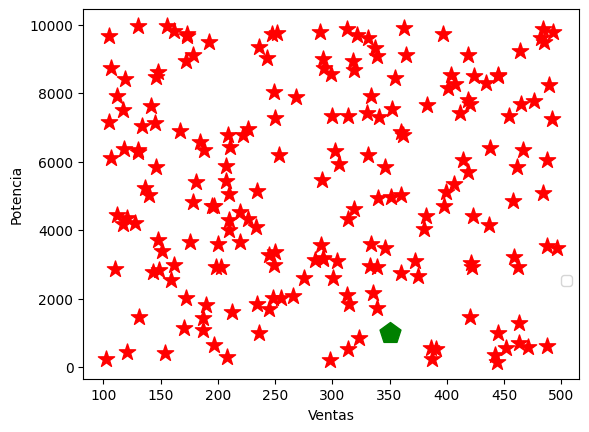

In [4]:
potencia_1=350
ventas_1=1010
clase_1=3

x_1= [potencia_1, ventas_1]
x_1 = np.array([x_1])
y_1= [clase_1]
y_1 = np.array([y_1])

# Escalado de características
scaler = StandardScaler()
scaler.fit(X_train_scaled)
sol_1= scaler.transform(x_1)
print("Clase:", knn.predict(sol_1))
print("Probabilidades por Clase", knn.predict_proba(sol_1))

#Código para graficar
plt.scatter (X["potencia"], X[ "ventas"],
            marker="*", s=150, color="red")
plt.scatter (potencia_1, ventas_1, marker="p", s=250, color="green")
plt.ylabel("Potencia")
plt.xlabel("Ventas")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()



In [5]:
# Entrenamiento del modelo KNN
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)

# Predicción de las clases
y_pred = knn.predict(X_test_scaled)

# Configuración de la validación cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Cálculo de métricas usando validación cruzada
accuracy_scores = cross_val_score(knn, X_train_scaled, y_train, cv=cv, scoring='accuracy')
recall_scores = cross_val_score(knn, X_train_scaled, y_train, cv=cv, scoring='recall_macro')
f1_scores = cross_val_score(knn, X_train_scaled, y_train, cv=cv, scoring='f1_macro')

(accuracy_scores.mean(), recall_scores.mean(), f1_scores.mean())

(0.2785714285714286, 0.26, 0.24009851259851261)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Clase: [3]
Probabilidades por Clase [[0.2        0.26666667 0.2        0.33333333]]


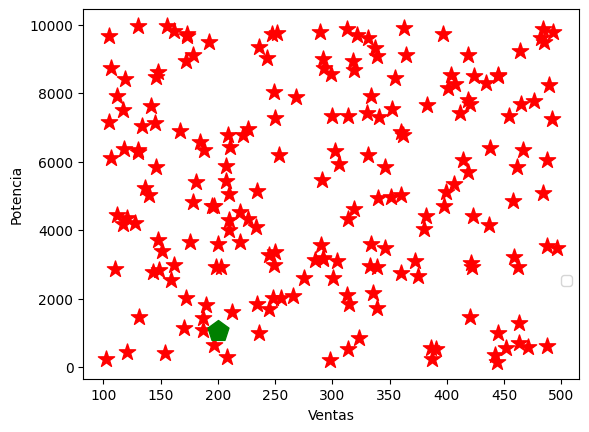

In [6]:
potencia_1=200
ventas_1=1051
clase_1=3

x_1= [potencia_1, ventas_1]
x_1 = np.array([x_1])
y_1= [clase_1]
y_1 = np.array([y_1])

# Escalado de características
scaler = StandardScaler()
scaler.fit(X_train_scaled)
sol_1= scaler.transform(x_1)
print("Clase:", knn.predict(sol_1))
print("Probabilidades por Clase", knn.predict_proba(sol_1))

#Código para graficar
plt.scatter (X["potencia"], X[ "ventas"],
            marker="*", s=150, color="red")
plt.scatter (potencia_1, ventas_1, marker="p", s=250, color="green")
plt.ylabel("Potencia")
plt.xlabel("Ventas")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()

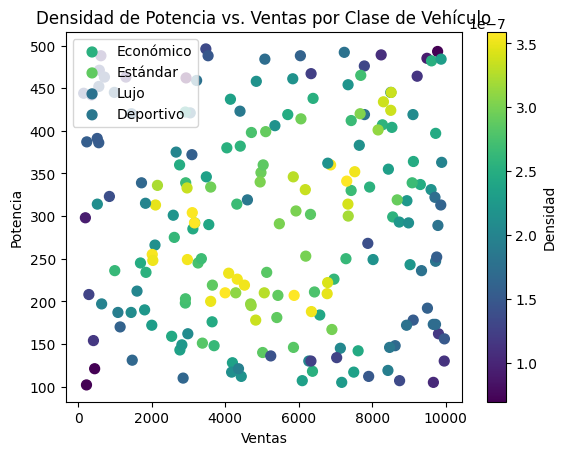

In [7]:
# Graficar densidades por clase
for clase in nombres_clases:
    data_clase = df[df['clase'] == clase]
    
    # Calcular la densidad de puntos usando np.histogram2d o similar
    x = data_clase['ventas']
    y = data_clase['potencia']
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    
    # Graficar los puntos con la densidad como color
    plt.scatter(x, y, c=z, s=50, label=nombres_clases[clase])

plt.xlabel('Ventas')
plt.ylabel('Potencia')
plt.title('Densidad de Potencia vs. Ventas por Clase de Vehículo')
plt.colorbar(label='Densidad')
plt.legend()
plt.show()